In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('heightss.csv')

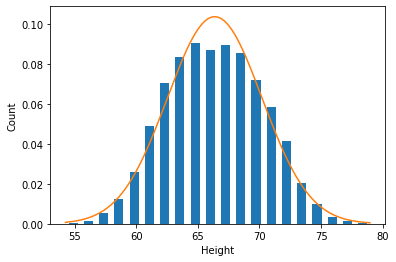

In [3]:
from scipy.stats import norm
plt.hist(df.height, bins = 20, rwidth = 0.6, density = True)
plt.xlabel('Height')
plt.ylabel('Count')
rng = np.arange(df.height.min(),df.height.max(),0.1)
plt.plot(rng,norm.pdf(rng,df.height.mean(),df.height.std()))

D:\Conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


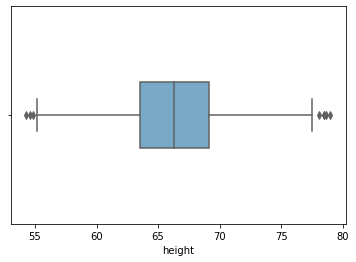

In [7]:
sns.boxplot(df['height'],palette="Blues",width = 0.3)
plt.show()
#outlier detected

Using standard deviation to remove outlier

In [8]:
upper_limit = df.height.mean()+ 3*df.height.std()
lower_limit = df.height.mean() - 3*df.height.std()

In [9]:
df[(df.height > upper_limit) | (df.height < lower_limit)]

,gender,height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [10]:
df2 = df[(df.height<upper_limit) & (df.height>lower_limit)]

Z-Score

Formula: (X-mean)/(std)

In [11]:
df['zscore'] = (df.height - df.height.mean())/df.height.std()

In [12]:
df[(df['zscore']>3) | (df['zscore'] < -3)]

,gender,height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027


In [13]:
#remove using the zscore and get the final result with outlier removed
df3 = df[(df['zscore']<3) & (df['zscore'] > -3)]
df3.head()

,gender,height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375
